## Привязка ID.xlsx

In [4]:
df = pd.read_excel('Привязка ID.xlsx')
print(df.head())

   ID              Источник
0   1  Маркетинговый список
1   2  Маркетинговый список
2   3  Маркетинговый список
3   4  Маркетинговый список
4   5  Маркетинговый список


# Сохранение всех городов из папки Marketing_Lists

In [ ]:
import pandas as pd
import glob

In [1]:
cities = []

for file in glob.glob(r"Marketing_Lists\МС_*.xls"):
    df = pd.read_excel(file)  
    if 'Город фактический' in df.columns:
        # Объединение и преобразование названий городов в нижний регистр
        cities.extend(df['Город фактический'].str.lower().unique())


cities = set(cities)  
cities_df = pd.DataFrame(cities, columns=['Города'])
cities_df.to_excel('cities.xlsx', index=False)

# Нормализация данных, вычисление корреляции, графики

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
data = pd.read_excel(r'Sample_20_people\train20_data.xlsx')
data.head().style

,ID,Находится в реестре МСП,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Провозная_плата_сумма,Объем_перевозок_сумма
0,9,0,5135000,9.000000,96,27,168141,50
1,25,0,5135000,352.000000,96,25,18211112,34923
2,33,0,443485350,1895.500000,84,21,105789052,31213
3,86,0,5135000,210.000000,96,11,0,0
4,115,0,20773333,1143.000000,96,16,113617841,41348


In [5]:
data = pd.read_excel(r'Sample_20_people\train20_data.xlsx')
df = pd.DataFrame(data)

### нормализация с использованием scaler.fit_transform

In [ ]:
# Масштабируем числовые признаки для их нормализации и уменьшения влияния различных единиц измерения.
# Мы используем StandardScaler для приведения признаков к стандартному нормальному распределению 
# со средним значением 0 и стандартным отклонением 1.
scaler = StandardScaler()
df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма'
    ]] = scaler.fit_transform(df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма']])

### нормализация с использованием MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма'
    ]] = scaler.fit_transform(df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма']])

### нормализация с использованием RobustScaler

In [9]:
import numpy as np

df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма'
    ]] = np.log1p(df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма']])

### нормализация с использованием Log Transformation (ПРИОРИТЕТ)

In [12]:
import numpy as np

df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма'
    ]] = np.log1p(df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная_плата_сумма', 'Объем_перевозок_сумма']])

### ...продолжение главной темы

In [28]:
# Выведем окончательный результат
print("\nПодготовленные данные:")
print(df)


Подготовленные данные:
        ID  Находится в реестре МСП  Размер уставного капитала объявленный  \
0        9                        0                               0.000513   
1       25                        0                               0.000513   
2       33                        0                               0.044348   
3       86                        0                               0.000513   
4      115                        0                               0.002076   
..     ...                      ...                                    ...   
312  10988                        1                               0.000000   
313  11009                        0                               0.000999   
314  11089                        1                               0.000000   
315  11102                        0                               0.000513   
316  11158                        0                               0.000513   

     Численность персонала по данным ФН

In [29]:
# Посмотрим на первые несколько строк данных
print("Первые 5 строк данных:")
print(df.head())

# Получим основные статистические показатели о клиентах
print("\nОсновные статистики о клиентах:")
print(df.describe())

Первые 5 строк данных:
    ID  Находится в реестре МСП  Размер уставного капитала объявленный  \
0    9                        0                               0.000513   
1   25                        0                               0.000513   
2   33                        0                               0.044348   
3   86                        0                               0.000513   
4  115                        0                               0.002076   

   Численность персонала по данным ФНС.Количество  \
0                                        0.001506   
1                                        0.066095   
2                                        0.356746   
3                                        0.039356   
4                                        0.215046   

   Карточка клиента (внешний источник).Индекс платежной дисциплины Значение  \
0                                           0.951807                          
1                                           0.951807   

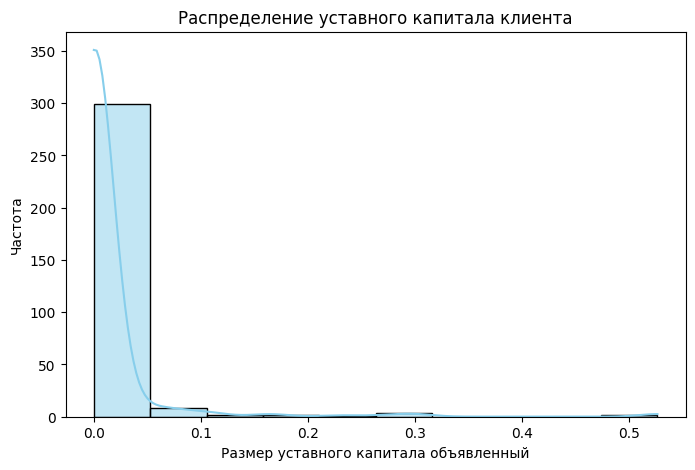

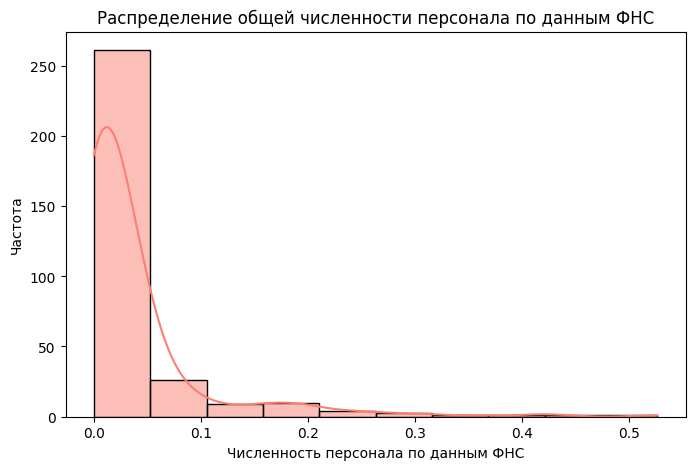

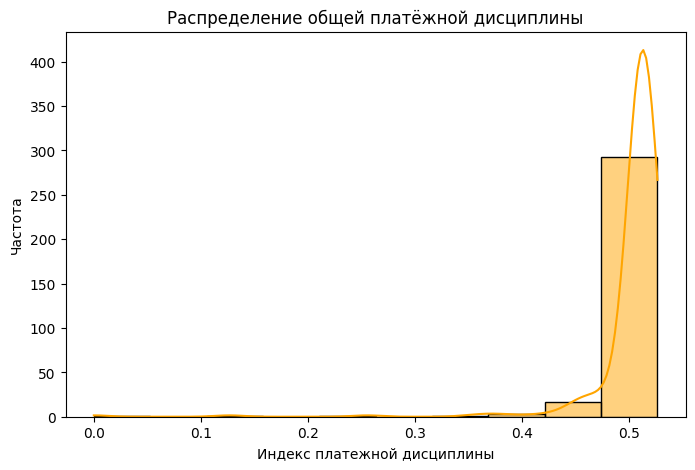

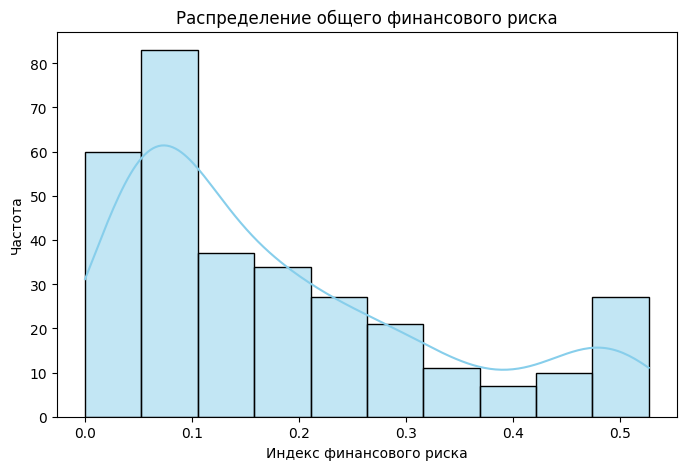

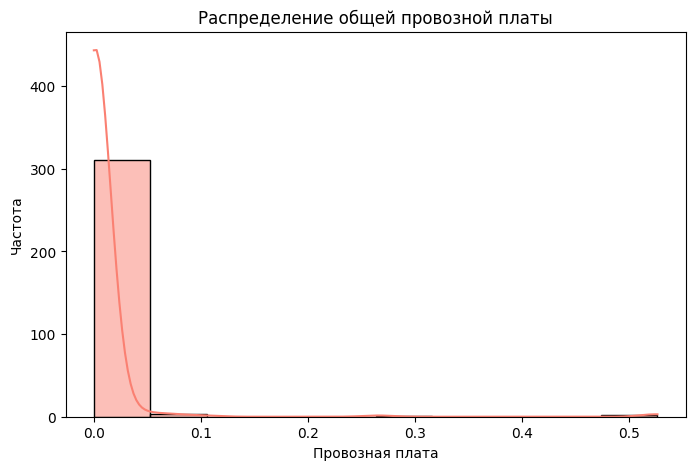

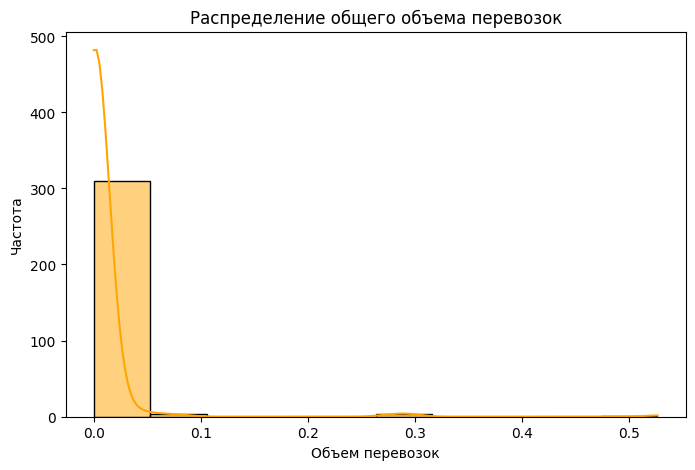

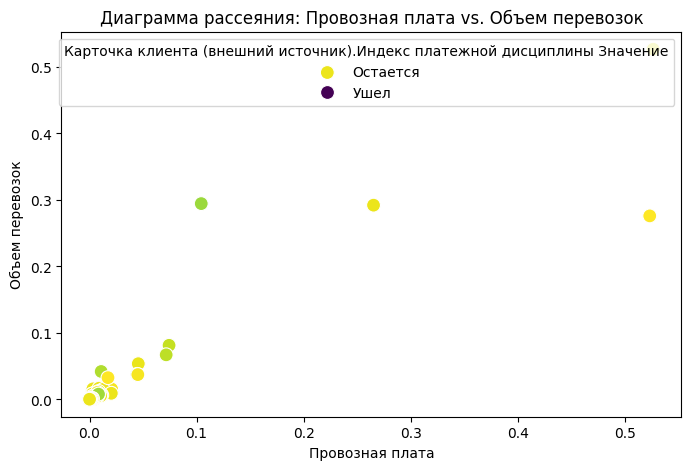

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#1
plt.figure(figsize=(8, 5))
sns.histplot(df['Размер уставного капитала объявленный'], bins=10, kde=True, color='skyblue')
plt.xlabel('Размер уставного капитала объявленный')
plt.ylabel('Частота')
plt.title('Распределение уставного капитала клиента')
plt.show()

#2
plt.figure(figsize=(8, 5))
sns.histplot(df['Численность персонала по данным ФНС.Количество'], bins=10, kde=True, color='salmon')
plt.xlabel('Численность персонала по данным ФНС')
plt.ylabel('Частота')
plt.title('Распределение общей численности персонала по данным ФНС')
plt.show()

#3
plt.figure(figsize=(8, 5))
sns.histplot(df['Карточка клиента (внешний источник).Индекс платежной дисциплины Значение'], bins=10, kde=True, color='orange')
plt.xlabel('Индекс платежной дисциплины')
plt.ylabel('Частота')
plt.title('Распределение общей платёжной дисциплины')
plt.show()

#4
plt.figure(figsize=(8, 5))
sns.histplot(df['Карточка клиента (внешний источник).Индекс финансового риска Значение'], bins=10, kde=True, color='skyblue')
plt.xlabel('Индекс финансового риска')
plt.ylabel('Частота')
plt.title('Распределение общего финансового риска')
plt.show()

#5
plt.figure(figsize=(8, 5))
sns.histplot(df['Провозная_плата_сумма'], bins=10, kde=True, color='salmon')
plt.xlabel('Провозная плата')
plt.ylabel('Частота')
plt.title('Распределение общей провозной платы')
plt.show()

#6
plt.figure(figsize=(8, 5))
sns.histplot(df['Объем_перевозок_сумма'], bins=10, kde=True, color='orange')
plt.xlabel('Объем перевозок')
plt.ylabel('Частота')
plt.title('Распределение общего объема перевозок')
plt.show()

# диаграмма рассеяния для визуализации связи между признаками Провозная_плата_сумма и Объем_перевозок_сумма
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Провозная_плата_сумма', y='Объем_перевозок_сумма', data=df, 
                hue='Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', palette='viridis', s=100)
plt.xlabel('Провозная плата')
plt.ylabel('Объем перевозок')
plt.title('Диаграмма рассеяния: Провозная плата vs. Объем перевозок')
plt.legend(title='Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', labels=['Остается', 'Ушел'])
plt.show()

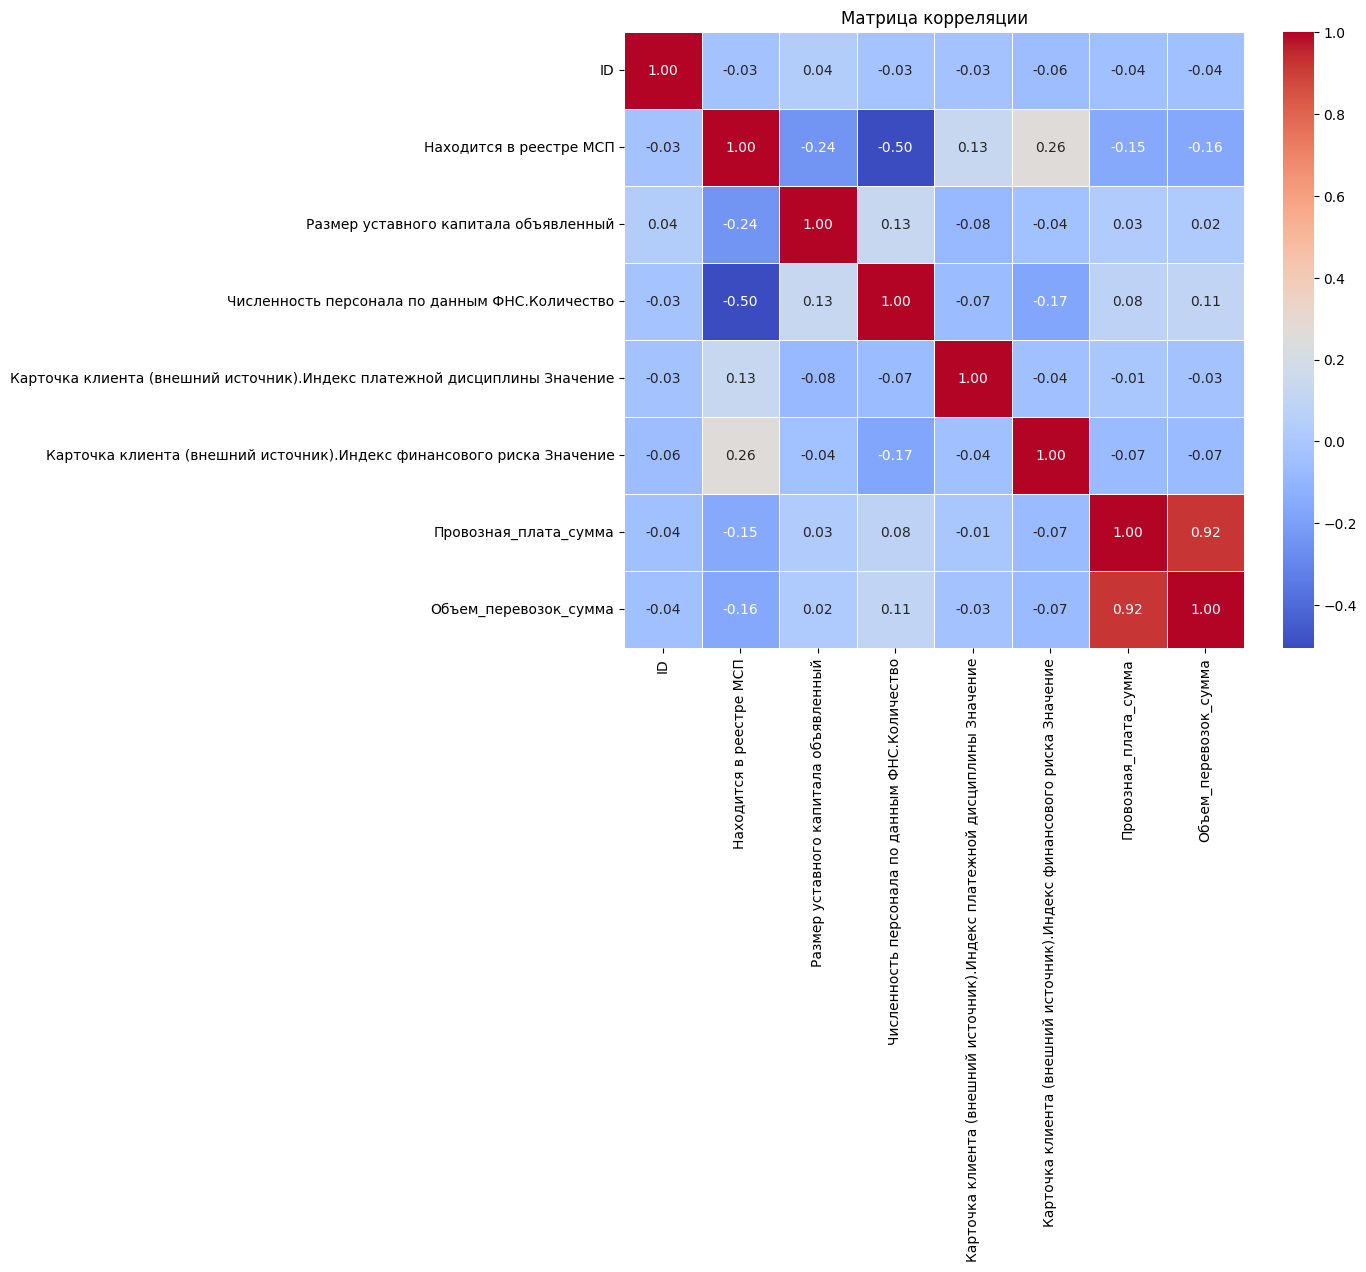

In [14]:
# Матрица корреляции между признаками
correlation_matrix = df.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')


#plt.savefig('correlation_matrix.png', format='png', dpi=300)  # Сохранение в PNG
plt.show()
